![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** John Kyalo
***

## Overview
This project is solely based on doing findings and analysis on movies to enable Microsoft have better insights as it tries to venture into the Movie Industry.


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

1. Identifying the key areas to venture into when it comes to Movie Production. This includes genres with a high ranking popularity.
2. From analysing the kind of dataset I used and the variables it contained help me come with questions that would lead to a relevant visualization. Populare genre, Popular time(year) with most productivity and most voted for movie. 
3.The same questions are the ones that determine the success of a movie industry and that;s what exactly Microsoft wants to be the best at. Being a key Movie Production Industry

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [49]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
# Here you run your code to explore the data

file_path=(r"C:\Users\USER\Downloads\dsc-Movie-Analysis\zippedData\tmdb.movies.csv\tmdb.movies.csv")
df=pd.read_csv(file_path)
df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [52]:
df.shape

(26517, 10)

In [53]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [54]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [55]:
#running code that cleans my data
#checking for null values
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [56]:
#convert release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [57]:
#extract year from release_date and create a new column
df['release_year'] = df['release_date'].dt.year
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


In [58]:
#Genre Analysis
#split genre_ids into individual_genre
df['genre_ids'] = df['genre_ids'].astype(str)
df['genre_ids'] = df['genre_ids'].str.strip('[]')
max_genres = df['genre_ids'].apply(lambda x: len(x.split(', '))).max()
genre_columns = df['genre_ids'].str.split(',', expand = True, n = max_genres - 1)
genre_columns.columns = [f'genre_{i+1}' for i in genre_columns.columns] #explode to create a new column for each genre
df = pd.concat([df, genre_columns], axis=1)
df
    

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,12,14,10751,None,None,None,None
1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,14,12,16,10751,None,None,None
2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,12,28,878,None,None,None,None
3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,16,35,10751,None,None,None,None
4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,28,878,12,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,"27, 18",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,27,18,None,None,None,None,None
26513,"18, 53",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,18,53,None,None,None,None,None
26514,"14, 28, 12",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,14,28,12,None,None,None,None
26515,"10751, 12, 28",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,10751,12,28,None,None,None,None


In [59]:
df.isna().sum()

genre_ids                0
id                       0
original_language        0
original_title           0
popularity               0
release_date             0
title                    0
vote_average             0
vote_count               0
release_year             0
genre_1                  0
genre_2              13176
genre_3              20593
genre_4              24878
genre_5              26178
genre_6              26452
genre_7              26508
dtype: int64

In [60]:
df.replace('', np.nan, inplace=True)

In [61]:
df.dropna(axis=1, how='all', inplace = True)

In [62]:
df['genre_ids'].value_counts()

99                       3700
18                       2268
35                       1660
27                       1145
53                        480
                         ... 
80, 18, 35, 10402           1
878, 18, 10749, 14          1
16, 10751, 12, 35, 14       1
28, 878, 53, 37             1
10751, 12, 28               1
Name: genre_ids, Length: 2476, dtype: int64

In [63]:
#explode genres
df_exploded = df.explode('genre_ids')
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,12,14,10751,None,None,None,None
1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,14,12,16,10751,None,None,None
2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,12,28,878,None,None,None,None
3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,16,35,10751,None,None,None,None
4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,28,878,12,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,"27, 18",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,27,18,None,None,None,None,None
26513,"18, 53",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,18,53,None,None,None,None,None
26514,"14, 28, 12",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,14,28,12,None,None,None,None
26515,"10751, 12, 28",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,10751,12,28,None,None,None,None


In [64]:
#count the occurrence of each genre
genre_counts= df_exploded[['genre_1', 'genre_2', 'genre_3','genre_4']].apply(pd.Series.value_counts).fillna(0)
genre_counts

,genre_1,genre_2,genre_3,genre_4
10402,0.0,443.0,113.0,24.0
10749,0.0,942.0,559.0,106.0
10751,0.0,585.0,352.0,146.0
10752,0.0,98.0,89.0,26.0
10770,0.0,408.0,205.0,91.0
12,0.0,536.0,224.0,77.0
14,0.0,374.0,287.0,122.0
16,0.0,415.0,116.0,26.0
18,0.0,2492.0,742.0,129.0
27,0.0,1062.0,316.0,76.0


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

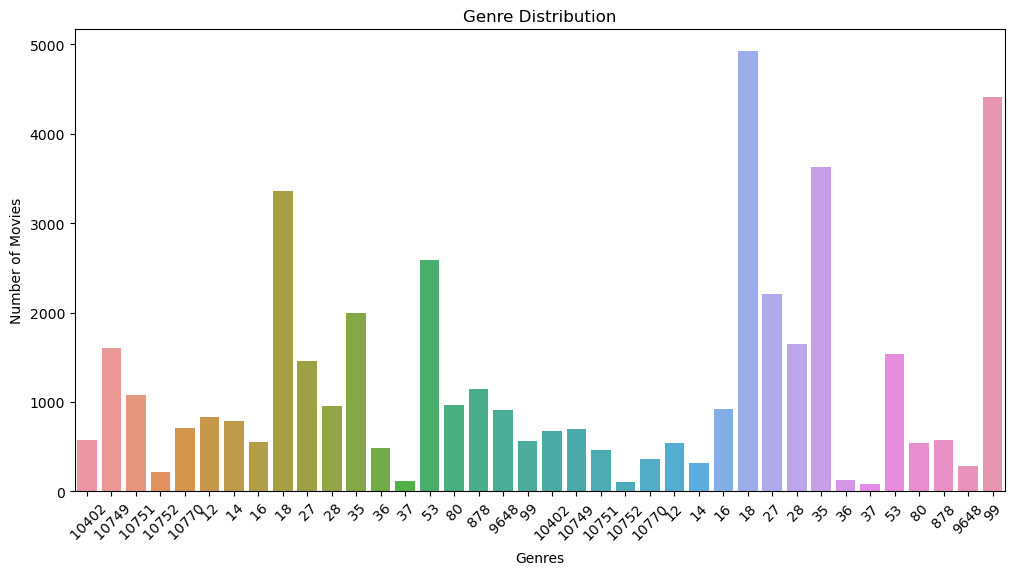

In [65]:
# Here you run your code to model the data
#visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.sum(axis = 1))
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Genre Distribution')
plt.show()

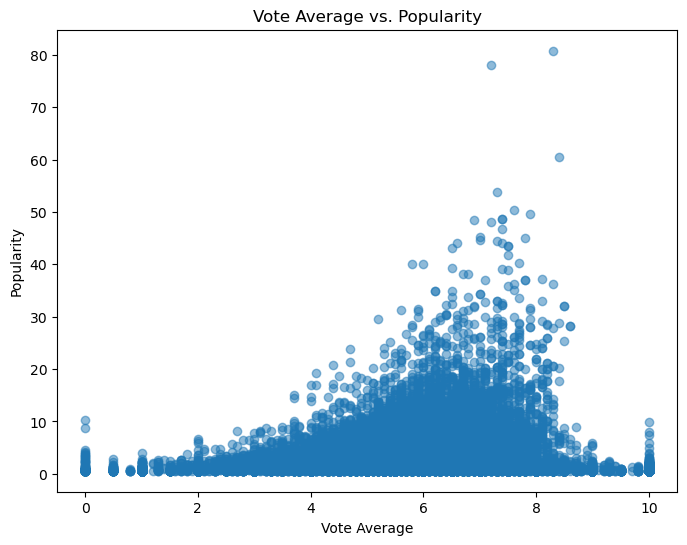

In [66]:
#Vote average distribution
plt.figure(figsize=(8,6))
plt.scatter(df['vote_average'],df['popularity'], alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Vote Average vs. Popularity')
plt.show()

In [67]:
#Release year Analysis
release_year_counts=df['release_year'].value_counts().sort_index()
release_year_counts

1930       1
1933       1
1936       1
1939       1
1946       1
        ... 
2016    3192
2017    3145
2018    2587
2019      63
2020       1
Name: release_year, Length: 66, dtype: int64

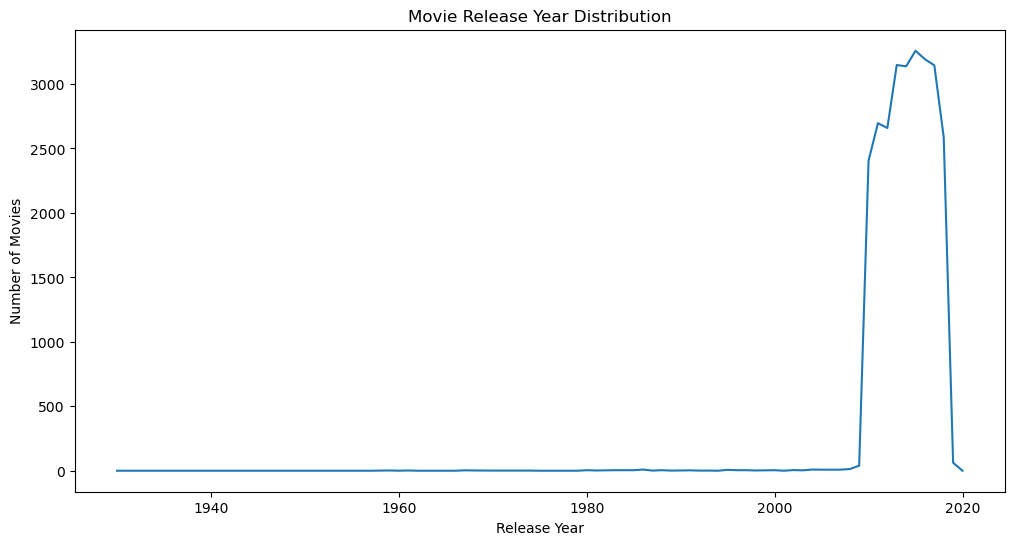

In [68]:
# Visualize release year distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movie Release Year Distribution')
plt.show()


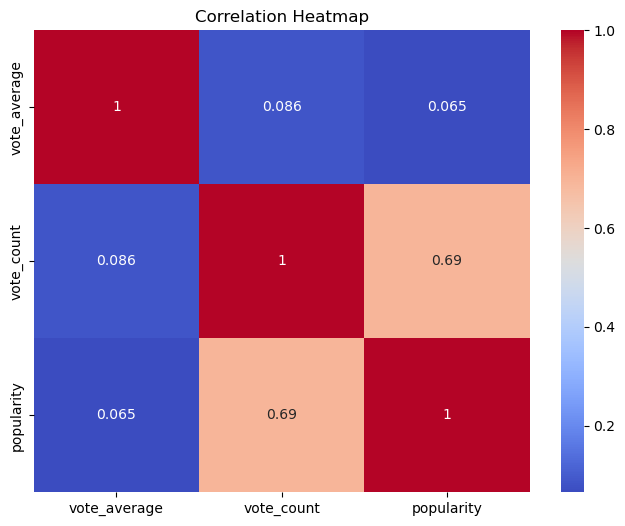

In [69]:
# Correlation between vote average, vote count, and popularity
correlation_matrix = df[['vote_average', 'vote_count', 'popularity']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

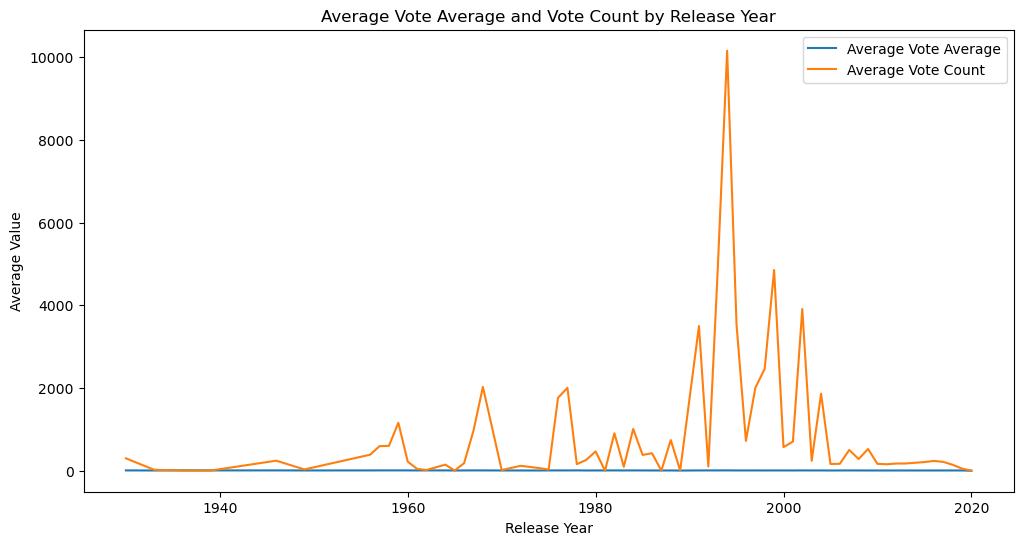

In [70]:
# Average vote average and vote count by release year
average_metrics_by_year = df.groupby('release_year')[['vote_average', 'vote_count']].mean()

plt.figure(figsize=(12, 6))
average_metrics_by_year['vote_average'].plot(label='Average Vote Average')
average_metrics_by_year['vote_count'].plot(label='Average Vote Count')
plt.xlabel('Release Year')
plt.ylabel('Average Value')
plt.title('Average Vote Average and Vote Count by Release Year')
plt.legend()
plt.show()

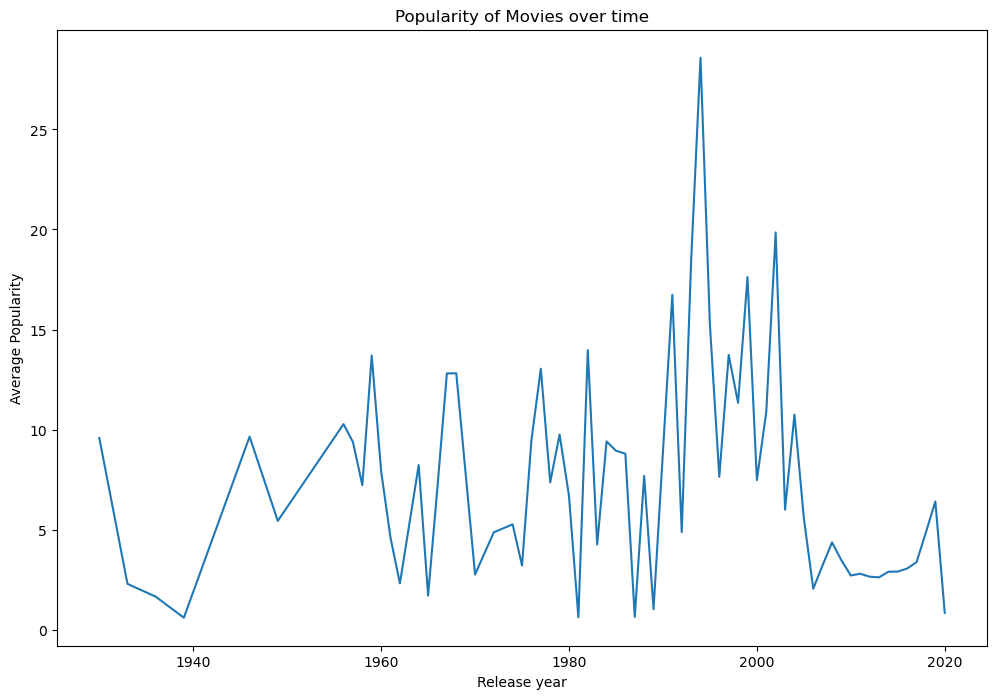

In [71]:
#Popularity versus Release year
popularity_by_year = df.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(12,8))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values)
plt.xlabel('Release year')
plt.ylabel('Average Popularity')
plt.title('Popularity of Movies over time')
plt.show()

In [74]:
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,12,14,10751,None,None,None,None
1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,14,12,16,10751,None,None,None
2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,12,28,878,None,None,None,None
3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,16,35,10751,None,None,None,None
4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,28,878,12,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,"27, 18",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,27,18,None,None,None,None,None
26513,"18, 53",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,18,53,None,None,None,None,None
26514,"14, 28, 12",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,14,28,12,None,None,None,None
26515,"10751, 12, 28",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,10751,12,28,None,None,None,None


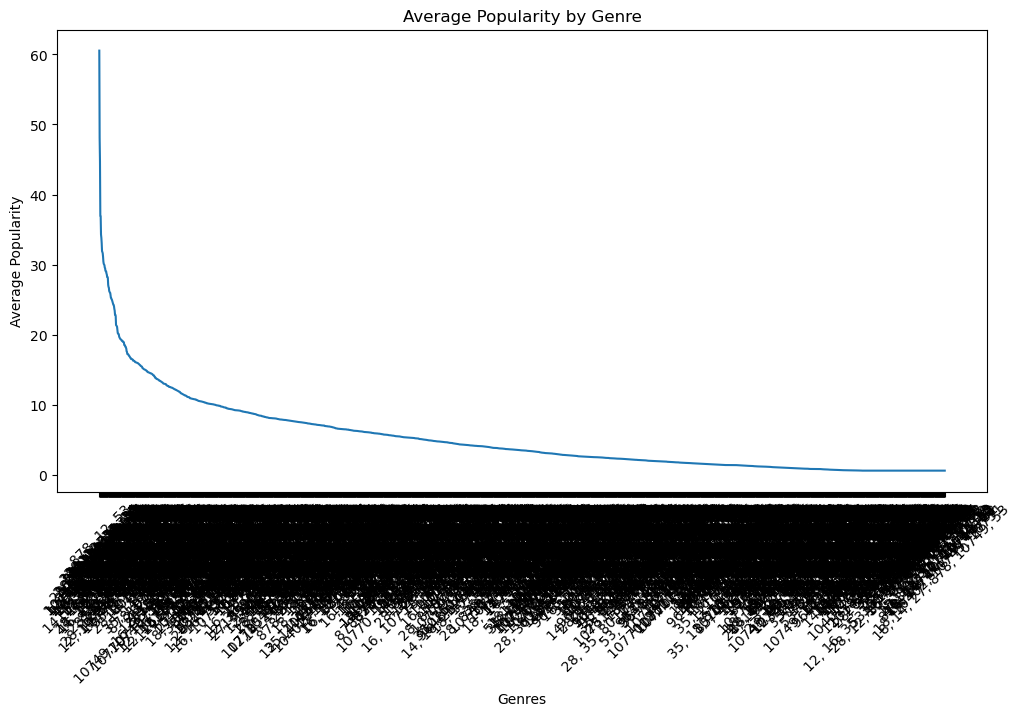

The most popular genre is: 28, 12, 16, 878, 35


In [78]:
#popular genre
#average popularity for each genre
average_popularity_by_genre=df_exploded.groupby('genre_ids')['popularity'].mean()

#sort genres by average_value in descending order
sorted_genres=average_popularity_by_genre.sort_values(ascending=False)

#visualize popular genres
plt.figure(figsize=(12,6))
sns.lineplot(x=sorted_genres.index, y=sorted_genres.values, palette = 'viridis')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()

#print most popular genre
most_popular_genre=sorted_genres.idxmax()
print(f"The most popular genre is: {most_popular_genre}")

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***


The most popular genre among the analyzed movies is 878,12,53 as indicated by its significantly higher average popularity compared to other genres.
There is a positive correlation between vote count and popularity, implying that movies with more votes tend to be more popular.
The line plot of movie releases by year indicates an increasing trend until a peak in the mid-2010s, followed by a decline. This could suggest changes in audience preferences or external industry factors.

The analysis aligns with expectations in terms of popularity of certain genres, correlation between vote count/popularity, and the fluctuation in movie releases over time.The model fit seems reasonable in capturing these trends.
While the trends observed in the dataset are insightful, it's important to recognize that the dataset might not be representative of the entire movie industry. The dataset could be biased towards certain genres or periods.
The analysis provides valuable insights into the movie industry's historical trends, but changes in audience preferences, technology, or external events might affect the generalization of these findings to future scenarios.


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

The analysis suggests actionable insights for the company. For example, 
leveraging the popularity of the top most genre could lead to increased viewership and revenue.
However, while the insights provide a valuable starting point, 
it's important to combine them with other sources of information and industry knowledge for more confident decision-making.
Implementing the insights may positively influence decision-making processes, 
but it's recommended to conduct further research and possibly run pilot projects to
validate the practical impact before full implementation.

Due to the nature of my dataset I might have been limited on drawing further actionable insights.
Getting the dataset more aligned, could help get a lot of predictive models.
